
# **Assignment for the Programming for Data Analysis**

****

The goal of this Notebook is to give an overview and purpose of the ``numpy.random`` package in Python.

### Table of content
[1. Purpose of the ``numpy.random`` package](#par1)<br>
[2. The use of "Simple random data" and "Permutation" functions](#par2)<br>
[2.1 Simple Random data](#par2.1)<br>
[2.1 Permutation functions](#par2.2)<br>
[3. The use and purpose of selected distributions functions](#par3)<br>
[3.1 Zipf distribution](#par3.1)<br>
> [3.1.1 Theory](#par3.1.1)<br>
[3.1.2 Use of ``numpy.random.Generator.zipf``](#par3.1.2)<br>

[3.2 Weibull distribution](#par3.2)<br>
> [3.2.1 Theory](#par3.2.1)<br>
[3.2.2 Use of ``numpy.random.Generator.weibull``](#par3.2.2)<br>

[3.3 Binomial distribution](#par3.3)<br>
> [3.3.1 Theory](#par3.3.1)<br>
[3.3.2 Use of ``numpy.random.Generator.binomial``](#par3.3.2)<br>

[3.4 Beta distribution](#par3.4)<br>
> [3.4.1 Theory](#par3.4.1)<br>
[3.4.2 Use of ``numpy.random.Generator.beta``](#par3.4.2)<br>

[3.4 Poisson distribution](#par3.5)<br>
> [3.4.1 Theory](#par3.5.1)<br>
[3.4.2 Use of ``numpy.random.Generator.poisson``](#par3.5.2)<br>

[4. Purpose of seeds in generating pseudorandom numbers](#par4)<br>
[5. References](#ref)<br>
<hr>

### Import all the packages

In [2]:
# import all the packackes used in the notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, zipf, weibull_min, beta, poisson

In [3]:
# Create the new instance of the numpy psudorandom numbers Generator
rng = np.random.default_rng()

<hr>

<a id="par1"></a>
## 1. Purpose of the ``numpy.random`` package

The main purpose of ``numpy.random`` package is to create sets of pseudorandom numbers. These numbers are extensively used in cryptography, simulations, games, optimization problems and many more [22]

What are random numbers? According to Wolfram MathWorld "a random number is a number chosen as if by chance from some specified distribution such that selection of a large set of these numbers reproduces the underlying distribution. Almost always, such numbers are also required to be independent, so that there are no correlations between successive numbers" [20]

The problem with creating such numbers using computer is that computers are really good at being predictable. If the same alghorithm with the same input values is ran many times on many different computers, the result will always be the same [21]. The only way to guarantee different output after each run, different inputs values has to be used. Changing of the input values in the pseudo-random generator context is called seeding (more on that in [Paragraph 4](#par4) )

This package ``numpy.random`` offers two way of generating pseudo-random numbers: 
* Simple random data (integers, random, choice and bytes) - all these functions return sets of pseudo-random values that follow uniform distribution, i.e. probability of occurence of each value is the same as any other value
* Distributions - there are 36 distinct functions that can be used to generate sets of pseudo-random values that follow specific statistical distribution, for example normal, binomial, exponential etc.

The default random number Generator in ``numpy.random`` is currently PCG64 (64-bit Permuted Congruential Generator) which is an improvement on the Linear Congruential Generators. The LCGs are one of the oldest techniques for generating a pseudo-random sequences of numbers. Their output is predictible and of mediocre statistical quality but they are still popular in less critical applications thanks to their speed, compact size, uniformity and the fact that they can generate many different sequences of numbers provided they are seeded with a different number [22]. These generators use a simple recurence to generate next value in the sequence [23]<br>

$$
X_{n+1}=(aX_n+c)\space mod \space m, \space n\ge 0
$$
Where <br>
$m$ is the modulus: $m>0$ <br>
$a$ is the multiplier: $0\le a < m$ <br>
$c$ is the increment:  $0\le c < m$ <br>
$X_0$ is the starting value, the seed:  $0\le X_0 < m$ <br>

The PCG family of generators improve on the LCG by adding one or more extra steps, for example:
* Dropping bits using a Fixed Shift
* Dropping bits using Random Shift
* Performing Fixed bitwise rotation
* Performing Random bitwise rotation

Thanks to addition of these steps, output of the PCG algorithms are challenging to predict and the quality of their statistical distribution is improved comparing to LCG [23].

<a id="par2"></a>
## 2. The use of "Simple random data" and "Permutations" functions

<a id="par2.1"></a>
### 2.1 Simple random data

Simple random data includes 4 functions: integers, random, choice and bytes. All these functions return sets of pseudo-random values that follow uniform distribution, i.e. probability of occurence of each value is the same as any other value.

**integers** - returns random integer values from *low* (inclusive) to *high* (exclusive). If parameter *endpoint=True*, returned values will include *high*.

Below is the example call of the function ``integers``, that will return 1000 numbers from 0 to 10 (inclusive)

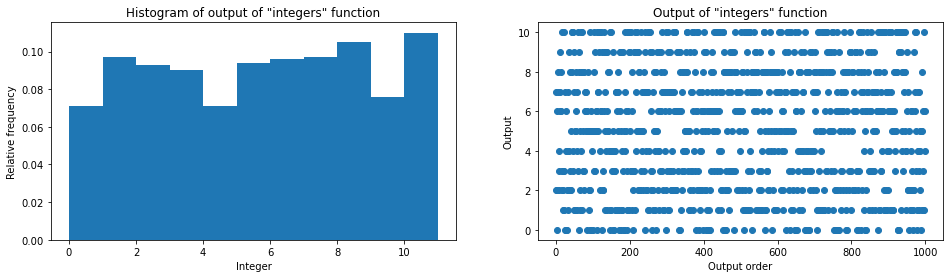

In [6]:
# Size of the generated array
n = 1000

# generate the array on n  integer values between 0 and 10
y = rng.integers(0, 10, size=n, endpoint=True)

# create a range for the histogram bins
b = np.arange(0, y.max()+2)

# create a range for the output order
x = np.arange(0, n)

# define the first plot of the subplot: 1 row, 2 columns
plt.subplot(1,2,1)

#define the size of the plot to make sure there is enough space between the subplots to display the axis descriptions
plt.rcParams["figure.figsize"] = [16, 4]

# Add the histogram to the plot
count, bins, ignored = plt.hist(y, b, density=True)


# add plot descriptions
plt.title('Histogram of output of "integers" function')
plt.xlabel('Integer')
plt.ylabel('Relative frequency')

# define the second plot of the subplot: 1 row, 2 columns
plt.subplot(1,2,2)

# Add scatter plot: output value vs output order 
plt.scatter(x,y)

# add plot descriptions
plt.title('Output of "integers" function')
plt.xlabel('Output order')
plt.ylabel('Output')

# Show the plot
plt.show()

**random** - results are from random continuous uniform distribution. Real numbers are pooled from the interval from *0* (inclusive) to *1* (exclusive).

In the cell below is the example output of 1000 values generated using ``random`` function

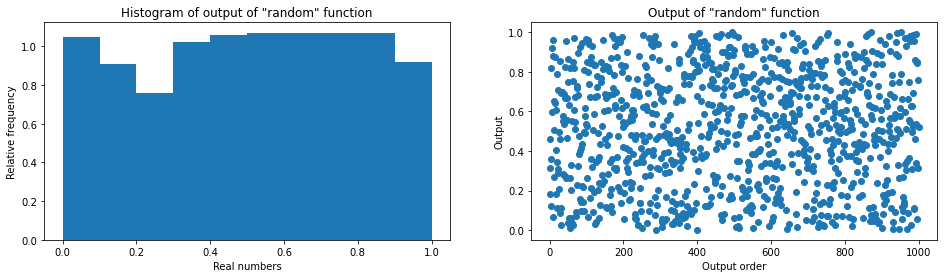

In [7]:
# Size of the generated array
n=1000

# generate the array on n real numbers between 0 and 1 (1 exclusive)
y = rng.random(n)

# create a range for the histogram bins
b = np.arange(0, 11)/10.

# create a range for the output order
x = np.arange(0, n)

# define the first plot of the subplot: 1 row, 2 columns
plt.subplot(1,2,1)

#define the size of the plot to make sure there is enough space between the subplots to display the axis descriptions
plt.rcParams["figure.figsize"] = [16, 4]

# Add the histogram to the plot
count, bins, ignored = plt.hist(y, b, density=True)

# add histogram description
plt.title('Histogram of output of "random" function')
plt.xlabel('Real numbers')
plt.ylabel('Relative frequency')

# define the second plot of the subplot: 1 row, 2 columns
plt.subplot(1,2,2)

# Add scatter plot: output value vs output order 
plt.scatter(x,y)
plt.title('Output of "random" function')
plt.xlabel('Output order')
plt.ylabel('Output')

# Show the plot
plt.show()

**choice** - generates a random sample from a given array. If instead of array, integer number is given, the output is pooled from the array created: ``np.arange(int)``. As an optional input, probability array can be specified that will give probability of each entry in the input array. If this parameter is not given, a uniform distribution is assumed.

Optional parameter *replace* - if not specified or set to True, meaning that each value from the input array can be selected multiple times. If set to False, each value could be selected only once (in this instance, the size of the output array can not be larger than the input array).

Optional parameter *shuffle* - specifies wheter the order of the output array will be shuffled when sampling without replacement.

Cell below have an example output from the choice function. The output values are pooled from the array [3, 11, 13, 17, 19] with given relative frequency [0.1, 0.1, 0.2, 0.2, 0.4]

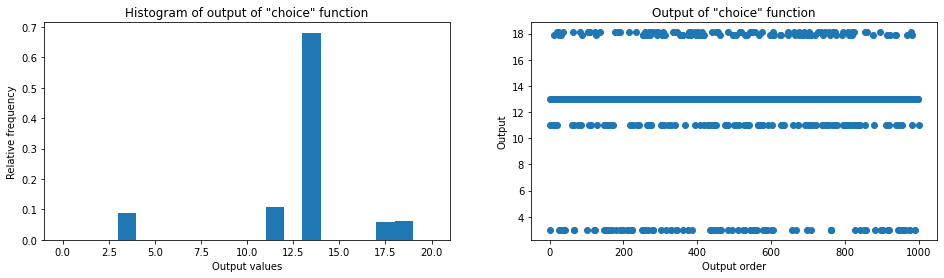

In [14]:
# Size of the generated array
n=1000

# define the input array. Values from this array will be pooled to create the output array
a = [3, 11, 13, 17.9, 18.1]

# define the array of the probabilities associated with each element in the array a
# sum of the probabilities has to be equal 1
# The size and shape of this array has to be the same as the input array
prob_array = [0.1, 0.1, 0.7, 0.05, 0.05]

# Cerate an array of values pooled from array a with the relative frequency defined in the array prob_array
y = rng.choice(a , n, p=prob_array)

# create a range for the histogram bins
b = np.arange(0, y.max()+2)

# create a range for the output order
x = np.arange(0, n)

# define the first plot of the subplot: 1 row, 2 columns
plt.subplot(1,2,1)

#define the size of the plot to make sure there is enough space between the subplots to display the axis descriptions
plt.rcParams["figure.figsize"] = [16, 4]

# Add the histogram to the plot
count, bins, ignored = plt.hist(y, b, density=True)

# add histogram description
plt.title('Histogram of output of "choice" function')
plt.xlabel('Output values')
plt.ylabel('Relative frequency')

# define the second plot of the subplot: 1 row, 2 columns
plt.subplot(1,2,2)

# Add scatter plot: output value vs output order 
plt.scatter(x,y)

# add scatter plot descriptions
plt.title('Output of "choice" function')
plt.xlabel('Output order')
plt.ylabel('Output')

# Show the plot
plt.show()

**bytes** - returns a string of random bytes of the specified length. 

In the cell below, we generated 20 random bytes:

In [15]:
# create 20 random bytes
rng.bytes(20)

b'\xc4O;&M\x8e&\n\xf9`X\x9aN\xc2\xeb\xe9\xc9t<\xa5'

<a id="par2.2"></a>
### 2.2 Permutations

There are 3 permutations functions available: shuffle, permutation and permuted. All of them take an array as an input and return another array of the same sime with the elements from the original array re-ordered in a random fashion. They don't change the content of the input array: all of the elements are used in the output array and no new elements are added. There are some subtle diffrences between them:

**shuffle** - this function doesn not create a copy of the input array but instead re-arranges the order of the original array. In real life this would be similar to shuffling a deck of cards.

In [20]:
# create an input numpy array of [0..19]
arr = np.arange(20)

# display the original array
print("The original input array: \n{}".format(arr))

# call the shuffle function on the original array
rng.shuffle(arr)

# display the original array after shuffling
print("\nThe original array after shuffling: \n{}\n".format(arr))

The original input array: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

The original array after shuffling: 
[ 0 13  2 19  3  1 14 11 17 10 16  5  9 12  4 15  7  8 18  6]



**permutation** - similarly to shuffle, output of this function is a re-arranged input array. The difference is, that this function will not change the order of the input array but instead it will create a copy and shuffle the copy instead. If we keep to the deck of card analogy, this function would be like creating second, identical deck of cards and shuffling the second deck only while leaving the original deck unchanged.

In [24]:
# create an input numpy array of [0..19]
arr = np.arange(20)

# create an output array with the elements of arr shuffled
out = rng.permutation(arr)

# display both array
print("Order of the original array is unchanged: \n{}\n".format(arr))
print("The copy array is shuffled instead: \n{}".format(out))
print()

Order of the original array is unchanged: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

The copy array is shuffled instead: 
[ 3 10 12 15 19 16  1 18  0 13  9 11  7  6 17 14  5  8  4  2]



**permuted** - this function randomly shuffles an input array along the specified axis. If one dimensional array is supplied, the output of this function will be the same as permutation function. This function would be analogous to having several decks of cards and shuffling each deck independently (axis=1) or shufling all the cards between the decks that are on the top of the deck, then on the second position from the top and so on until the bottom of the deck (axis=0).

In [27]:
# create a 2D 5x5 original numpy array
x = np.arange(25).reshape(5, 5)

# display the original array
print("\nOriginal 2D array: \n\n {}".format(x))

# shuffle the elements of array x along the axis 0 and store the result in array y
y = rng.permuted(x, axis=0)

# Display the result
print("\nCopy of original array shuffled along the axis 0: \n\n {}".format(y))

# shuffle the elements of array x along the axis 1 and store the result in array y
y = rng.permuted(x, axis=1)

# Display the result
print("\nCopy of original array shuffled along the axis 1: \n\n {}".format(y))

# shuffle the elements of array x along the axis 0 and store the result in array y
y = rng.permuted(x, axis=0)
# shuffle the elements of array y along the axis 1 and store the result in array y
rng.permuted(y, axis=1, out=y)

# Display the result
print("\nCopy of original array shuffled along the axis 0 and then along the axis 1: \n\n {}".format(y))


Original 2D array: 

 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

Copy of original array shuffled along the axis 0: 

 [[ 5 21  2  8 24]
 [10 16 12  3  4]
 [20  1 17 18  9]
 [ 0  6  7 13 19]
 [15 11 22 23 14]]

Copy of original array shuffled along the axis 1: 

 [[ 0  1  2  3  4]
 [ 8  9  7  5  6]
 [12 10 14 13 11]
 [15 19 17 16 18]
 [20 22 23 24 21]]

Copy of original array shuffled along the axis 0 and then along the axis 1: 

 [[22 11  3 10 14]
 [15 24  6  7 18]
 [ 2  4  1 13 20]
 [ 8 12 19 16  0]
 [21 23  5 17  9]]


<a id="par3"></a>
## 3. The use and purpose of selected distributions functions


**Probability density function (PDF)** - used to specify the probability of the random continuous variable falling within a particular range of values. This probability is given by the integral of this variable's PDF over that range [11]

**Probability mass function (PMF)** - a function that gives the probability that a discrete random variable is exactly equal to some value (also known as discrete density function) [12]

**Cumulative distribution function (CDF)** - used to calculate the area under the probability density function from minus infity to x. In other words, it gives the probability that the random variable will take the value less than or equal to x [13]

<a id="par3.1"></a>
### 3.1 Zipf distribution

<a id="par3.1.1"></a>
#### 3.1.1 Theory

The Zipf distribution, is a discrete distribution (one of a family of related discrete power law probability distributions) commonly used in linguistics, insurance and the modelling of rare events [4] This distribution was named after American linguist George Kingsley Zipf, who popularized it while attempting to explain the strange phenomenon observed in distribution of words within any language: the frequency of occurence of any word seems to be inversyly proportional to its rank in the frequency table [3]. The second most used word will appear about half as often as the most used, the third one third as often, the fourth one fourth as often and so on [5]. Whether the most commonly used words are ranked across entire language or in just one book, almost every time this pattern emerges. The consequence of this property is that natural languages consist of a very small number of words repeated very often, larger group used moderately and very large groups of words used rarelly [14]

There any many other phenomenas that appear to follow the Zipf distribution [2]:
* Citations of scientific papers
* Web hits
* Copies of books sold
* Number of phone calls received
* Distribution of the first digits in any socially or naturally related datasets (budget, income tax or populations) - known as Benford's Law [6] 


The probability mass function for the Zipf distribution is described by the following function:

$$
f(n)=\frac{n^{-a}}{\zeta(a)}
$$

Where the $\zeta(a)$ is the Riemann Zeta function:
$$
\zeta(a)=\sum_{k=1}^\infty \frac{1}{k^a}
$$

For the populations with a finite number of elements $N$, the normalized frequency of the element of rank $n$ can be specified as:
$$
f(n;a,N)=\frac{n^{-a}}{\sum_{k=1}^N \frac{1}{k^a}}
$$
where $a$ is the exponent parameter characterizing the distribution [3]

<a id="par3.1.2"></a>
#### 3.1.2 Use of ``numpy.random.Generator.zipf``

The ``numpy.random.Generator.zipf`` function can be used to generate an array of psedorandom values that follow Zipf's distribution. It accepts 2 parameters:
* a - distribution parameter (must be greater than 1)
* size - the size of the generated array. This parameter is optional, if no size is specified, a single value is returned

#### Example use case: sample distribution of words in English language

Let's generate sample distribution of the words in English language. The distribution parameter **a** has been empirically selected to match reported words distribution in the Brown Corpus [3] and the fact that the half of the words volume consist of repeated use of only 135 words [14]

|Rank|Word| Frequency of occurence|
|---|---|---|
|1|  the | 6.9971%|
|2|  of | 3.6411%|
|3|  and | 2.8852%|

In [81]:
# define a simple function to find an 'a' parameter that will create the Zipf distribution where
# 'j' words will be responsoble for total of 'goal' volume

def find_a(goal, j):
    
    # accuracy of the match 
    acc=0.000001
    # initial step
    step=0.1
    # initial 'a' value
    a = 1.5
    
    # calculate the cumulative density function of zipf distribution for the initial parameters
    p = zipf.cdf(j, a, loc=0)
    
    # check if the calculated value of cdf is smaller (sign=1) or larger (sign=-1) than the goal
    sign = np.sign(goal-p)
    
    # keep the initial value of the sign
    sign1=sign
    
    # repeat while the difference between the cdf and the goal is greater than the accuracy
    while abs(goal-p)>acc:
            
        # change the initial value of the 'a' parameter by the step and the sign vector
        a = a + step*sign
        
        # re-calculate the value of cdf using new 'a' parameter
        p = zipf.cdf(j, a, loc=0)
        
        # re-calculate the sign vector
        sign = np.sign(goal-p)
        
        # if the sign has changed (cdf changed from being smaller than goal to bigger than goal or vice versa)
        if sign != sign1:
            # store the new value of the sign
            sign1= sign
            # decrease the step size
            step = step/2
    
    # return the final value of parameter 'a'
    return a

In [82]:
# distribution parameter 'a' selected to match the criteria above
a = find_a(0.5, 135)
# array of 10000 psedorandom values that were pooled from Zipf's distribution
zipf_set = rng.zipf(a, 10000)

In [86]:
print()
# print the frequency of accurence of 3 top words from generated distribution
for i in [1,2,3]:
    print("Frequency of occurence of the word Rank {}: {}".format(i, len(zipf_set[zipf_set==i])/len(zipf_set)))
    

print()
# To estimate the percentage of the volume of words taken by the first 135 words, we'll use the Cumulative Distribution Function:
print("Percentage of the total volume of words taken by the first {} words: {:.2%}".format(135, zipf.cdf(135, a, loc=0)))


Frequency of occurence of the word Rank 1: 0.1166
Frequency of occurence of the word Rank 2: 0.0516
Frequency of occurence of the word Rank 3: 0.0352

Percentage of the total volume of words taken by the first 135 words: 50.00%


##### Graphical representation: Histogram, probability mass function and cumulative density function <br>

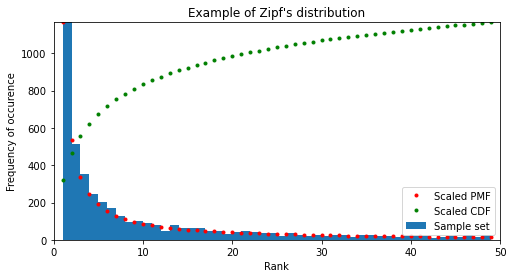

In [88]:
# number of histogram bins
max_n = 50

# create a x values array for the plots
x = np.arange(1., max_n)
count, bins, ignored = plt.hist(zipf_set, x, label='Sample set')


# Calculate the y values using PMF and CDF of the Zipf distribution, from https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.zipf.html
y = zipf.pmf(x, a, loc=0)
y2 = zipf.cdf(x, a, loc=0)

# calculate the scaling factor, to match the scale of pmf and zipf_set histogram
scale = count.max()/y.max()
scale2 = count.max()/y2.max()

# add PMF and CDF to the plot
plt.plot(x, y*scale, 'r.', label='Scaled PMF')
plt.plot(x, y2*scale2, 'g.', label='Scaled CDF')

# define plot's parameters
plt.axis([0, max_n, 0, count.max()])
plt.rcParams["figure.figsize"] = [8, 4]
plt.xlabel('Rank')
plt.ylabel('Frequency of occurence')
plt.title('Example of Zipf\'s distribution')
plt.legend()
plt.show()

Zipf's law is most easily observed by plotting the data on the log-log plot, with the x axis being log(rank order) and the y log(frequency). Let's re-plot the ``zipf`` array and the theoretical probability density distribution ``pdf`` using log-log plot:

In [ ]:
# Add histogram of the zipf_set to the plot
count, bins, ignored = plt.hist(zipf_set[zipf_set<max_n], max_n, density=True, label='Sample set')

# add pmf to the plot
plt.plot(x, y*scale, 'r.', label='Scaled PMF')
plt.plot(x, y2*scale2, 'g.', label='Scaled CDF')

# define plot's parameters
plt.rcParams["figure.figsize"] = [8, 4]
plt.legend()
plt.title('Example of Zipf\'s distribution on log-log plot')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency of occurence)')
plt.yscale('log')
plt.xscale('log')
plt.show()

#### The effect of the distribution parameter 'a' on the Zipf distribution

In [ ]:
def sub_plt(p, a):
    max_n = 50
    
    # array of 10000 psedorandom values pooled from Zipf's distribution
    zipf_set = rng.zipf(a, 100000)
    
    # define x and y for the Zipf's  PMF and CDF
    x = np.arange(1., max_n)
    y = zipf.pmf(x, a, loc=0)
    y2 = zipf.cdf(x, a, loc=0)

    # Add sample Zipf's set histogram to the plot
    count, bins, ignored = plt.hist(zipf_set[zipf_set<max_n], max_n, density=True, label='Sample set')
    
    # calculate the scaling factor, to match the scale of pmf and zipf_set histogram
    scale = count.max()/y.max()
    scale2 = count.max()/y2.max()
    
    p.plot(x, y*scale, 'r.', label='Scaled pmf')
    p.plot(x, y2*scale2, 'g.', label='Scaled CDF')
    
    # Plot's parameters
    p.legend()
    p.axis([0, max_n, 0, count.max()])
    p.title('a={}'.format(a))

# as per How to increase the spacing between subplots in Matplotlib [9]
plt.rcParams["figure.figsize"] = [14, 10]

    
a=1.01
plt.subplot(2,2,1)
sub_plt(plt, a)

a=1.5
plt.subplot(2,2,2)
sub_plt(plt, a)

a=2.
plt.subplot(2,2,3)
sub_plt(plt, a)

a=3.
plt.subplot(2,2,4)
sub_plt(plt, a)

plt.show()

<br>

<a id="par3.2"></a>
### 3.2 Weibull distribution
    

<a id="par3.2.1"></a>
#### 3.2.1 Theory

The Weibull distribution is a continuous probability distribution named after Swedish mathematician Waloddi Weibull. It is being widely used in the reliability engineering, failure analysis and survival analysis [7]. For the general (3-parameter) Weibull distribution, the probability density function is defined as [8]:
$$
f(x)=\frac{a}{\alpha}*(\frac{x-\mu}{\alpha})^{(a-1)}*e^{-\frac{x-\mu}{\alpha}^{a}}
$$
where:
* $a$ is the shape parameter; this allows a distribution to take on a variety of shapes
* $\mu$ is the location parameter; the effect of this parameter is translation of the graph by the value of this parameter right (for $\mu>0$) or left (for $\mu<0$)
* $\alpha$ is the scale parameter; the effect of this parameter is to strech out the graph

When $\mu=0$ and the $\alpha=1$ the resulting distribution is called the standard (or one-parameter) Weibull distribution. In this case, the probability density function reduces to:
$$
f(x)=a*x^{(a-1)}*e^{-x^a}
$$

<a id="par3.2.2"></a>
#### 3.2.2 Use of ``numpy.random.Generator.weibull``

The ``numpy.random.Generator.weibull`` function can be used to generate an array of psedorandom values that follow Weibull's one-parameter distribution. The function accepts 2 parameters:
* a - shape parameter (must be equal or greater than 0)
* size - the size of the generated array. This parameter is optional, if no size is specified, a single value is returned

Let's generate example array:

In [ ]:
# shape parameter of the Weibull distribution
a = 2.5

# Array of a pseudorandom numbers pooled from the one-parameter Weibull distribution with the shape parameter a
weibull_set = rng.weibull(a, 1000)

In [ ]:
count, bins, ignored = plt.hist(weibull_set, 50, label='Sample set')

# calculate x and y for the Weibull's PDF and CDF
x = np.arange(1, 100.)/100.*max(weibull_set)
y = weibull_min.pdf(x, a, loc=0, scale=1)
y2 = weibull_min.cdf(x, a, loc=0, scale=1)

scale = count.max()/y.max()
scale2 = count.max()/y2.max()

plt.plot(x, y*scale, color='red', label='Scaled pdf')
plt.plot(x, y2*scale2, color='green', label='Scaled cdf')

plt.rcParams["figure.figsize"] = [8, 4]
plt.xlabel('Time')
plt.ylabel('Number of failures')
plt.title('Example of Weibulls\'s distribution')
plt.legend()

plt.show()

#### The effect of the shape parameter on Weibull distribution

In [ ]:
def sub_plt(p, a):
    weibull_set = rng.weibull(a, 1000)
    
    # calculate x and y for the Weibull's PDF and CDF
    x = np.arange(1, 100.)/100.*max(weibull_set)    
    y = weibull_min.pdf(x, a, loc=0, scale=1)
    y2 = weibull_min.cdf(x, a, loc=0, scale=1)

    # Add the histogram of weibull's sample set to the plot
    count, bins, ignored = p.hist(weibull_set, 50, label='Sample set')
    
    # scale factors for PDF and CDF
    scale = count.max()/y.max()
    scale2 = count.max()/y2.max()
    
    # Add scaled PDF and CDF to the plot
    p.plot(x, y*scale, color='red', label='Scaled PDF')
    p.plot(x, y2*scale2, color='green', label='Scaled PDF')
    
    p.legend()
    p.title('a={}'.format(a))

# as per How to increase the spacing between subplots in Matplotlib [9]
plt.rcParams["figure.figsize"] = [14, 10]
    
a=0.5
plt.subplot(2,2,1)
sub_plt(plt, a)

a=1.
plt.subplot(2,2,2)
sub_plt(plt, a)

a=2.
plt.subplot(2,2,3)
sub_plt(plt, a)

a=5.
plt.subplot(2,2,4)
sub_plt(plt, a)

plt.show()

<a id="par3.3"></a>
### 3.3 Binomial distribution

<a id="par3.3.1"></a>
#### 3.3.1 Theory

Binomial distribution is a discrete probability distribution used for calculating the probability of the outcome in a process, experiment or a survey that can have only 2 outcomes (hence the prefix "bi"): Success/Fail, Yes/No, Accept/Reject, Heads/Tails etc. To be able to use the Binomial distrubution, the following criteria has to be satisfied [10]:
* Number of trials or observations is fixed
* Each trial is independednt
* The probability of Success in each trial is exactly the same in each trial

The probability mass function for the binomial distribution is (probability of N successes out of n trials given success rate of p):
<br>

$$
f(N; n, p) = \frac{n!}{N!(n-N)!}*p^N*(1-p)^{n-N}
$$
where $n$ is the number of trails/observations, $N$ is the number of successes and $p$ is the probability of success.

<a id="par3.3.2"></a>
#### 3.3.2 Use of ``numpy.random.Generator.binomial``

The ``numpy.random.Generator.binomial`` function can be used to generate an array of psedorandom values (non-negative integers only) that follow binomial distribution. The function call has the following format:

``numpy.random.Generator.binomial(n, p, size)``<br>

Where:
* n - number of trials (>=0)
* p - probability of success (any real number between 0 and 1)
* size - the size of the generated array. This parameter is optional, if no size is specified, a single value is returned

##### Example use case: coin flips

As an example, let's generate an array of results of flipping a coin 10 times, tested 10.000 times. As a convention, let's agree that the 'Success' is when coin shows 'Heads':

In [ ]:
n, p = 10, .5  # number of trials, probability of each trial
binom_set = rng.binomial(n, p, 10000)

In [ ]:
# Let's see the size of resulting array and the first k generated numbers:
k=5
print()
print("Size of the array: {}".format(binom_set.shape))
print("First {} numbers of generated values: {}. That means, in the first trail there was {} 'Heads', in second {} 'Heads' and so on...".format(k,binom_set[1:k], binom_set[1], binom_set[2]))

<br>
Each number in the array above is the number of successes or 'Heads' in each trail.
<br>

##### Graphical representation: Histogram, probability mass function and cumulative density function <br>

In [ ]:
# calculate PMF and CDF for binomial distribution as per https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.binom.html#scipy.stats.binom
x = np.arange(0, n+1)
y = binom.pmf(x, n, p, loc=0)
y2 = binom.cdf(x, n, p, loc=0)

# Add the histogram to the plot
count, bins, ignored = plt.hist(binom_set, x, label='Sample set')

# Calculate the scale factors for PMF and CDF to match their y values with histogram height
scale = count.max()/ y.max()
scale2 = count.max()/ y2.max()

# Add the PMF and CDF to the plot
plt.plot(x, y*scale, 'r*', label='Scaled PMF')
plt.plot(x, y2*scale2, 'g*', label='Scaled CDF')

# Plot's parameters
plt.rcParams["figure.figsize"] = [8, 4]
plt.xlabel('Number of \'tails\' from 10 tosses')
plt.ylabel('Number of trials with given outcome')
plt.title('Example of Binomial distribution')
plt.legend()

plt.show()

##### The effect of the probability on binomial distribution

In [ ]:
def sub_plt(p, prob):
    n=12
    binom_set = rng.binomial(n, prob, 10000)
    
    # calculate x and y for the PDF and CDF
    x = np.arange(0, n+1)  
    y = binom.pmf(x, n, prob, loc=0)
    y2 = binom.cdf(x, n, prob, loc=0)

    # Add the histogram to the plot
    count, bins, ignored = p.hist(binom_set, x, label='Sample set')
    
    # scale factors for PDF and CDF
    scale = count.max()/y.max()
    scale2 = count.max()/y2.max()
    
    # Add scaled PDF and CDF to the plot
    p.plot(x, y*scale, 'r*', label='Scaled PDF')
    p.plot(x, y2*scale2, 'g*', label='Scaled PDF')
    
    p.legend()
    p.title('probability={}'.format(prob))

# as per How to increase the spacing between subplots in Matplotlib [9]
plt.rcParams["figure.figsize"] = [14, 10]
    
p=.1
plt.subplot(2,2,1)
sub_plt(plt, p)

p=1./6
plt.subplot(2,2,2)
sub_plt(plt, p)

p=0.5
plt.subplot(2,2,3)
sub_plt(plt, p)

p=0.7
plt.subplot(2,2,4)
sub_plt(plt, p)

plt.show()

<br>

<a id="par3.4"></a>
### 3.4 Beta distribution
    

<a id="par3.4.1"></a>
#### 3.4.1 Theory
    

Beta distribution is a probability distribution on probability values.<br>
Binomial distribution is used to model number of successes given probability of success in a single trial (the probability is a parameter). Beta distribution is used to model the probability of success in a single trial, given number of successes (probability is a variable) [15].

Probability density function of beta distribution is given by the function:
$$
f(p) = \frac{p^{\alpha-1}*(1-p)^{\beta-1}}{B(\alpha, \beta)}
$$

$B(\alpha, \beta)$ is a normalizing coefficient used here to make the Probability density function integrate to 1 and it has a form of:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}
$$

where $\Gamma$ is a Gamma function - generalization of the factorial to all real and complex numbers (factorial is only defined for positive integers) and can be calculated using the following equation [16]:

$$
\Gamma(z)=\int^\infty_0 t^{z-1}e^{-t}dt
$$
for all the natural numbers:
$$
\Gamma(n+1)=n!
$$

<a id="par3.4.2"></a>
#### 3.4.2 Use of ``numpy.random.Generator.beta``

The ``numpy.random.Generator.beta`` function can be used to generate an array of psedorandom values that follow beta distribution. The function call has the following format:

``numpy.random.Generator.beta(a, b, size)``<br>

Where:
* a - number of successes + 1
* b - number of failures + 1
* size - the size of the generated array. This parameter is optional, if no size is specified, a single value is returned

<br>

##### Example use case: 

As an example, let's genereate the set of 10,000 possible probabilities of having a satisfactory transaction from an online reseller that have 83 positive reviews and 5 negative reviews [17]: <br>
a = 83+1<br>
b = 5+1<br>

In [ ]:
a, b = 84, 6  # number of successes (positive reviews) +1, number of failures (negative reviews) +1
beta_set = rng.beta(a, b, 10000)

##### Graphical representation: Histogram, probability density function and cumulative density function <br>

In [ ]:
# calculate PDF and CDF for beta distribution as per https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
x = np.arange(0, 101)/100.
y = beta.pdf(x, a, b, loc=0, scale=1)
y2 = beta.cdf(x, a, b, loc=0, scale=1)

# Add the histogram to the plot
count, bins, ignored = plt.hist(beta_set, x, density=True, label='Sample set')

# Add the PDF and CDF to the plot
plt.plot(x, y, 'r', label='PDF')
# CDF values run from 0 to 1. Multyplying it's values by the max of PDF to match their heights on the plot
plt.plot(x, y2*y.max(), 'g', label='CDF scaled')

# Plot's parameters
plt.rcParams["figure.figsize"] = [8, 4]
plt.xlabel('Probability of success')
plt.ylabel('Relative frequency')
plt.title('Example of Beta({},{}) distribution'.format(a,b))
plt.legend()

plt.show()

In [ ]:
print()
print("We can have 99% certainty, that the true probability of success when dealing with this online reseller lies in the interval of {} ".format(beta.interval(.99, a, b, loc=0, scale=1)))
print()

##### The effect of parameters 'a' nad 'b' on the shape of the Beta distribution

In [ ]:
def sub_plt(p, a, b):
    n=100
    # generate array of 10.000 numbers of out beta distribution
    beta_set = rng.beta(a, b, 10000)
    
    # calculate x and y for the PDF and CDF
    x = np.arange(1, n)/n
    y = beta.pdf(x, a, b, loc=0, scale=1)
    y2 = beta.cdf(x, a, b, loc=0, scale=1)

    # Add the histogram to the plot
    count, bins, ignored = plt.hist(beta_set, x, density=True, label='Sample set')
    
    # Add scaled PDF and CDF to the plot
    p.plot(x, y, 'r', label='PDF')
    p.plot(x, y2*y.max(), 'g', label='Scaled PDF')
    
    p.legend()
    p.title('Beta({},{}) distribution'.format(a,b))

# as per How to increase the spacing between subplots in Matplotlib [9]
plt.rcParams["figure.figsize"] = [20, 10]
    
a, b = .3, .3
plt.subplot(2,3,1)
sub_plt(plt, a, b)

a, b = 1, 1
plt.subplot(2,3,2)
sub_plt(plt, a, b)

a, b = 2, 2
plt.subplot(2,3,3)
sub_plt(plt, a, b)

a, b = 51, 51
plt.subplot(2,3,4)
sub_plt(plt, a, b)

a, b = 11, 91
plt.subplot(2,3,5)
sub_plt(plt, a, b)

a, b = 901, 101
plt.subplot(2,3,6)
sub_plt(plt, a, b)

plt.show()

<br>

<a id="par3.5"></a>
### 3.5 Poisson distribution

<a id="par3.5.1"></a>
#### 3.5.1 Theory
    

Poisson distribution is a discrete distribution named after it's discoverer, a French 18th century mathematician Siméon-Denis Poisson. It is used to model the probability of a given number of events occuring in a fixed interval of time or space, if these events occur at known constant rate and are independent of each other [19]. Poisson distribution is particulary usefull when modeling infrequent events (cases of rare dissease over time, floods in 100 years, goals per match, meteorites hits per century etc.) [18] <br>

The Poisson distribution is similar to binomial in that it is also used with counts or the number of events but their application differ. The binomial distribution is used when the sample size n is selected and the number of events and nonevents (or successes and failures) are determined from the sample. The Poisson is used when events occur at random in time or space and the number of these events is noted. When Poisson distribution is used, no sample size has to be selected [18]. <br>

The probability mass function for Poisson distribution is:
$$
f(k; \lambda)= \frac{\lambda^k e^{-\lambda}}{k!} \space \space for \space x=0,1,2,3,......
$$
where $\lambda$ is expected number of events in a fixed-time interval, $\lambda>0$


<a id="par3.5.2"></a>
#### 3.5.2 Use of ``numpy.random.Generator.poisson``

``numpy.random.Generator.poisson(lam, size)``<br>

Where:
* lam - expected number of events in a fixed-time interval, lam>=0
* size - the size of the generated array. This parameter is optional, if no size is specified, a single value is returned

<br>

##### Example use case: 

Online shop has a mean of click-through sale rate of 12 items per hour. Let's genereate the set of 10,000 possible hourly sale figures for this shop:
<br>

In [ ]:
lam = 12  # expected (mean) number of sells per hour
poi_set = rng.poisson(lam, 10000)

##### Graphical representation: Histogram, probability mass function and cumulative density function: <br>

In [ ]:
# Add the histogram to the plot
x = np.arange(0, poi_set.max()+1)
count, bins, ignored = plt.hist(poi_set, x, density=True, label='Sample set')

# calculate PMF and CDF values
y = poisson.pmf(x, lam)
y2 = poisson.cdf(x, lam)

# Add the PDF and CDF to the plot
plt.plot(x, y, 'r*', label='PMF')
# CDF values run from 0 to 1. Multyplying it's values by the max of PDF to match their heights on the plot
plt.plot(x, y2*y.max(), 'g*', label='CDF scaled')

# Plot's parameters
plt.rcParams["figure.figsize"] = [8, 4]
plt.xlabel('Number of sales per hour')
plt.ylabel('Relative frequency')
plt.title('Example of Poisson distribution with lambda= {}'.format(lam))
plt.legend()

plt.show()

In [ ]:
print()
print("The minimum number of sales in one hour in generater set is {}. This happened {} times".format(poi_set.min(), poi_set[poi_set==poi_set.min()].size ))
print("The maximum number of sales in one hour in generater set is {}. This happened {} times".format(poi_set.max(), poi_set[poi_set==poi_set.max()].size ))
print()

##### The effect of parameter 'lambda' on the shape of the Poisson distribution

In [ ]:
def sub_plt(p, l):

    # generate array of 10.000 numbers of out poisson distribution
    poi_set = rng.poisson(l, 10000)
    
    # calculate x and y for the PDF and CDF
    x = np.arange(0, poi_set.max()+1)
    # calculate PMF and CDF values
    y = poisson.pmf(x, lam)
    y2 = poisson.cdf(x, lam)

    # Add the normilized histogram to the plot
    count, bins, ignored = plt.hist(poi_set, x, density=True, label='Sample set')
    
    # Add scaled PMF and CDF to the plot
    p.plot(x, y, 'r*', label='PMF')
    p.plot(x, y2*y.max(), 'g*', label='Scaled PDF')
    
    p.legend()
    p.title('Example of Poisson distribution with lambda= {}'.format(l))

# as per How to increase the spacing between subplots in Matplotlib [9]
plt.rcParams["figure.figsize"] = [20, 10]
    
lam = 0.5
plt.subplot(2,2,1)
sub_plt(plt, lam)

lam = 3
plt.subplot(2,2,2)
sub_plt(plt, lam)

lam = 6
plt.subplot(2,2,3)
sub_plt(plt, lam)

lam = 12
plt.subplot(2,2,4)
sub_plt(plt, lam)

plt.show()

<a id="par4"></a>
## 4. Purpose of seeds in generating pseudorandom numbers

The problem with creating random numbers using computer is that computers are really good at being predictable. If the same alghorithm with the same input values is ran many times on many different computers, the result will always be the same [21]. The only way to guarantee different output after each run, different inputs values has to be used. Changing of the input values in the pseudo-random generator context is called seeding. 

All the generators in the ``numpy.random`` package can use any non-negative integer or list of such integers as a seed [24]. If no seed is provided by the user, the 64-bit hash of time and process ID is used as a seed. This will guarante, that the generator will return different set of pseudo-random numbers each time it is run.

In principle, if the seed value and the algoritm used are know, the exact stream of pseudo-random numbers can be predicted. Therefore, in applications that require the utmost level of unpredictability (like cryptography), the seeds are obtained from external and entirely unpredictable sources. One of the most interesting sources of random seeds that I found is used by Clouflare in their San Francisco office [21, 26] They are using a feed from the camera that is pointed at the wall of lava lamps. This feed is fed into their Random Number Generator as a seed. Because of the chaotic nature of the lava lamps, this process guarantees that the seed numbers will be random and therefore the resulting output of the algoritm will be totally unpredictible.

![lavaLamps](http://blog.cloudflare.com/content/images/2017/11/lava-lamps.jpg)

In some instances it is required, that the output of the random generator is the same after each run of the program. For example, in the research paper where the simulation used random numbers, the same set of random numbers has to be used to verify the results of the simulation. It is not always practical to include the generated set of random numbers but it is possible to guarantee that the same pseduo-random numbers will be generated every time the simulation is ran by seeding the Generator with the same seed. In the ``numpy.random`` package, this can be done when creating the instance of the Generator class using ``default_rng``:<br>
``rng = np.random.default_rng(Seed)``

In the example below, I have used the seed equal to 98345 and the result of the ``integers(5, size=4)`` will always be the array [4, 3, 0, 2]

In [ ]:
rng = np.random.default_rng(98345)
print("As long as we use seed 98345, this will always be [4,3,0,2]: {}".format(rng.integers(5, size=4)))

Once the seed is known, the deterministic nature of the stream of generated pseudo-random numbers is clearly visible. In the cell below I have called the ``rng.integers(5)`` 5 times, each time with the output size increased by 1. We can clearly see, that each consecutive string of values consist the same values as the previous string with a new value added to it:

In [ ]:
rng = np.random.default_rng(98345)
print(" {}".format(rng.integers(5, size=1)))
rng = np.random.default_rng(98345)
print(" {}".format(rng.integers(5, size=2)))
rng = np.random.default_rng(98345)
print(" {}".format(rng.integers(5, size=3)))
rng = np.random.default_rng(98345)
print(" {}".format(rng.integers(5, size=4)))
rng = np.random.default_rng(98345)
print(" {}".format(rng.integers(5, size=5)))

To ensure the same number sequence is generated in each run, new instance of Generator class has to be called before each run. Otherwise the Generator will continue outupting next number in the sequence as shown in the cell below:

In [ ]:
rng = np.random.default_rng(98345)
print(" {}".format(rng.integers(5)))
print(" {}".format(rng.integers(5)))
print(" {}".format(rng.integers(5)))
print(" {}".format(rng.integers(5)))
print(" {}".format(rng.integers(5)))

<a id="ref"></a>
## 5. References

[[1] The Ultimate Markdown Guide (for Jupyter Notebook)](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)<br>
[[2] Power laws, Pareto distributions and Zipf’s law](https://arxiv.org/pdf/cond-mat/0412004.pdf)<br>
[[3] Zipf's law, Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)<br>
[[4] Zipf Distribution, Wolfram MathWorld](https://mathworld.wolfram.com/ZipfDistribution.html)<br>
[[5] The Zipf Mystery, Vsauce](https://www.youtube.com/watch?v=fCn8zs912OE)<br>
[[6] Benford's Law and Zipf's Law](http://www.cut-the-knot.org/do_you_know/zipfLaw.shtml)<br>
[[7] Weibull distribution, Wikipedia](https://en.wikipedia.org/wiki/Weibull_distribution)<br>
[[8] Weibull distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3668.htm)<br>
[[9] How to increase the spacing between subplots in Matplotlib](https://www.tutorialspoint.com/how-to-increase-the-spacing-between-subplots-in-matplotlib-with-subplot2grid)<br>
[[10] What is a Binomial Distribution?](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/)<br>
[[11] Probability density function, Wikipedia](https://en.wikipedia.org/wiki/Probability_density_function)<br>
[[12] Probability mass function, Wikipedia](https://en.wikipedia.org/wiki/Probability_mass_function)<br>
[[13] Cumulative distribution function, Wikipedia](https://en.wikipedia.org/wiki/Cumulative_distribution_function)<br>
[[14] Fagan, Stephen; Gençay, Ramazan (2010), "An introduction to textual econometrics"](https://books.google.com/books?hl=en&lr=&id=QAUv9R6bJzwC&oi=fnd&pg=PA139)<br>
[[15] Beta Distribution — Intuition, Examples, and Derivation, towardsdatascience](https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af)<br>
[[16] Gamma Function — Intuition, Derivation, and Examples, towardsdatascience](https://towardsdatascience.com/gamma-function-intuition-derivation-and-examples-5e5f72517dee)<br>
[[17] A Bayesian view of Amazon Resellers, John D. Cook](https://www.johndcook.com/blog/2011/09/27/bayesian-amazon/)<br>
[[18] Probability distributions](https://reader.elsevier.com/reader/sd/pii/B9780123694928500108?token=96B5DB7C90D3BCB1C2C4892663D4FDDA4E9F35267C4C9B502681442982E3BEE03E8AC107919F2DF9AF5B6A3A71D11E9A&originRegion=eu-west-1&originCreation=20211120154158)<br>
[[19] Poisson distribution, Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)<br>
[[20] Random Number, Wolfram MathWorld](https://mathworld.wolfram.com/RandomNumber.html)<br>
[[21] Randomness 101: LavaRand in Production, Cloudflare Blog](https://blog.cloudflare.com/randomness-101-lavarand-in-production/)<br>
[[22] Stanford Seminar - PCG: A Family of Better Random Number Generators, Stanfordonline](https://www.youtube.com/watch?v=45Oet5qjlms)<br>
[[23] PCG: A Family of Simple Fast Space-Efficient Statistically Good Algorithms for Random Number Generation, Harvey Mudd College](https://www.pcg-random.org/pdf/hmc-cs-2014-0905.pdf) <br>
[[24] Bit Generators, NumPy documentation](https://numpy.org/doc/stable/reference/random/bit_generators/index.html#seeding-and-entropy)<br>
[[25] randomgen.pcg64.PCG64.seed](https://bashtage.github.io/randomgen/bit_generators/generated/randomgen.pcg64.PCG64.seed.html#randomgen.pcg64.PCG64.seed)<br>
[[26] The Lava Lamps That Help Keep The Internet Secure, Tom Scott](https://www.youtube.com/watch?v=1cUUfMeOijg)<br>

## The End